In [1]:
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout, Flatten

Using TensorFlow backend.


In [2]:
data_csv=pd.read_csv(r'C:\Users\HIRANMAYI\Final year project\dataset.csv',delimiter=',')
data_npz=np.array(data_csv)

In [3]:
df=data_csv
df_x=df.iloc[:,0:394]
y=df.iloc[:,394].values.reshape(len(df),1)
print("x=",df_x.shape)
print("y=",y.shape)

x= (25345, 394)
y= (25345, 1)


In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x,y,test_size=0.3, random_state=0)
print(x_test.shape)
print(y_test.shape)

(7604, 394)
(7604, 1)


In [5]:
#from sklearn.preprocessing import StandardScaler
#s=StandardScaler()
#s.fit(x_train)

In [6]:
#x_train_scaled=s.transform(x_train)
#x_test_scaled=s.transform(x_test)

In [7]:
model=Sequential()
model.add(Dense(128,input_dim=394,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='linear'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
#keras.optimizers.Adam(lr=0.0003)
model.compile(loss='mse',optimizer='adam',metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               50560     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 58,881
Trainable params: 58,881
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(x_train,y_train,epochs=100,batch_size=32,validation_split=0.3, verbose=1)


Train on 12418 samples, validate on 5323 samples
Epoch 1/100
12418/12418 [==============================] - 1s 80us/step - loss: 5342.0989 - mae: 30.4978 - val_loss: 265.6155 - val_mae: 12.8449
Epoch 2/100
12418/12418 [==============================] - 1s 66us/step - loss: 221.0566 - mae: 11.6949 - val_loss: 142.2394 - val_mae: 9.4146
Epoch 3/100
12418/12418 [==============================] - 1s 62us/step - loss: 129.1223 - mae: 8.9712 - val_loss: 112.0868 - val_mae: 8.4689
Epoch 4/100
12418/12418 [==============================] - 1s 66us/step - loss: 97.5770 - mae: 7.7434 - val_loss: 76.2727 - val_mae: 6.8408
Epoch 5/100
12418/12418 [==============================] - 1s 65us/step - loss: 97.9123 - mae: 7.8163 - val_loss: 66.8865 - val_mae: 6.3475
Epoch 6/100
12418/12418 [==============================] - 1s 64us/step - loss: 85.7339 - mae: 7.3502 - val_loss: 110.2609 - val_mae: 8.7244
Epoch 7/100
12418/12418 [==============================] - 1s 66us/step - loss: 79.7323 - mae: 7.08

12418/12418 [==============================] - 1s 69us/step - loss: 31.7577 - mae: 4.3286 - val_loss: 37.1946 - val_mae: 4.8813
Epoch 58/100
12418/12418 [==============================] - 1s 65us/step - loss: 32.1162 - mae: 4.3727 - val_loss: 27.6726 - val_mae: 4.0588
Epoch 59/100
12418/12418 [==============================] - 1s 70us/step - loss: 29.3868 - mae: 4.1856 - val_loss: 56.1067 - val_mae: 6.1745
Epoch 60/100
12418/12418 [==============================] - 1s 66us/step - loss: 32.9889 - mae: 4.4415 - val_loss: 34.8642 - val_mae: 4.6197
Epoch 61/100
12418/12418 [==============================] - 1s 65us/step - loss: 30.4211 - mae: 4.2686 - val_loss: 36.0018 - val_mae: 4.7155
Epoch 62/100
12418/12418 [==============================] - 1s 68us/step - loss: 30.8060 - mae: 4.2875 - val_loss: 35.1194 - val_mae: 4.6799
Epoch 63/100
12418/12418 [==============================] - 1s 67us/step - loss: 31.2524 - mae: 4.3145 - val_loss: 29.1314 - val_mae: 4.1876
Epoch 64/100
12418/12418 [

In [10]:
yhat1=model.predict(x_test)
avg_yield=np.mean(yhat1)
print("yhat=",yhat1.shape)
print("average yield=",avg_yield)

yhat= (7604, 1)
average yield= 36.269806


In [11]:
mse=np.mean(np.square(y_test-yhat1))
rmse=np.sqrt(np.mean(np.square(y_test-yhat1)))
mae=np.mean(abs(y_test-yhat1))
print("Test mse=",mse)
print("Test rmse=",rmse)
print("Test mae=",mae)


Test mse= 32.374886485136784
Test rmse= 5.689893363248276
Test mae= 4.5062538194756705


In [12]:
yhat2=model.predict(x_train)
print("yhat=",yhat2.shape)

yhat= (17741, 1)


In [13]:
mse=np.mean(np.square(y_train-yhat2))
rmse=np.sqrt(np.mean(np.square(y_train-yhat2)))
mae=np.mean(abs(y_train-yhat2))
print("train mse=",mse)
print("train rmse=",rmse)
print("train mae=",mae)


train mse= 30.274459490025272
train rmse= 5.502223140697337
train mae= 4.37689132394775


In [14]:
s=model.evaluate(x_train,y_train)
print("train score:",s)

st=model.evaluate(x_test,y_test)
print("test score:",st)

17741/17741 [==============================] - 0s 19us/step
train score: [30.274459394847693, 4.376893043518066]
7604/7604 [==============================] - 0s 20us/step
test score: [32.37488616509917, 4.506254196166992]


In [15]:
from sklearn.metrics import r2_score
print("r^2 test score:",r2_score(y_test,yhat1))
print("r^2 train score:",r2_score(y_train,yhat2))

r^2 test score: 0.7354187954781959
r^2 train score: 0.7507549768816193


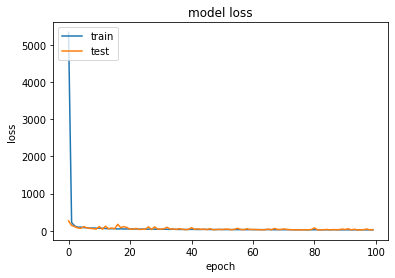

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
